# 2024 OIBC Challenge
## (Deep Learning version skeleton 02)

### 데이터 전처리

In [38]:
import pandas as pd
from functools import reduce
import os
from datetime import datetime, timedelta
from tqdm import tqdm
print(os.getcwd())  # 현재 작업 경로 출력

c:\Users\user\Desktop\24-OIBC-WolgoksTears\personal_files\hoon


actual_weather_1

In [39]:
# 데이터 불러오기
actual_weather_1 = pd.read_csv("../../data_files/actual_weather_1.csv")

# 'ts'를 datetime 형식으로 변환 후 1시간 단위로 맞추기
actual_weather_1['datetime'] = pd.to_datetime(actual_weather_1['ts'], unit='s')
actual_weather_1['datetime'] = actual_weather_1['datetime'].dt.round('h') + timedelta(hours=9)

# 원래 'ts' 열과 'location' 제거
actual_weather_1.drop(columns=['ts'], inplace=True)
actual_weather_1.drop(columns=['location'], inplace=True)

# 1시간 단위로 그룹화하여 평균을 계산 (location을 제외한 모든 열)
actual_weather_1 = actual_weather_1.groupby(['datetime'], as_index=False).mean()


# weather_forecast에 없는 columns 제거
actual_weather_1.drop(columns=['real_feel_temp_shade'], inplace=True)
actual_weather_1.drop(columns=['pressure'], inplace=True)
actual_weather_1.drop(columns=['appr_temp'], inplace=True)
actual_weather_1.drop(columns=['wind_chill_temp'], inplace=True)
 
# 결과 확인
actual_weather_1.head()

,datetime,temp,real_feel_temp,rel_hum,dew_point,wind_dir,wind_spd,wind_gust_spd,uv_idx,vis,cld_cvr,ceiling,wet_bulb_temp,precip_1h
0,2024-03-01 00:00:00,8.500000,8.000000,81.000000,5.500000,270.000000,6.100000,17.600000,0.0,20.900000,91.000000,579.000000,7.100000,0.100000
1,2024-03-01 01:00:00,7.158333,3.041667,72.666667,2.508333,234.666667,20.483333,26.366667,0.0,20.783333,97.750000,693.416667,5.091667,0.008333
2,2024-03-01 02:00:00,6.477778,2.111111,75.666667,2.433333,262.888889,21.944444,27.433333,0.0,20.033333,86.333333,616.222222,4.733333,0.011111
3,2024-03-01 03:00:00,6.045455,0.900000,74.545455,1.663636,213.000000,22.490909,27.645455,0.0,19.900000,62.818182,8692.363636,4.209091,0.136364
4,2024-03-01 04:00:00,5.430000,-0.090000,68.100000,-0.030000,256.800000,26.140000,42.440000,0.0,23.800000,38.100000,10911.800000,3.180000,0.410000


weather_forecast

In [40]:
# 데이터 불러오기
weather_forecast_1 = pd.read_csv("../../data_files/weather_forecast_1.csv")

# 'ts'를 datetime 형식으로 변환 후 1시간 단위로 맞추기
weather_forecast_1['datetime'] = pd.to_datetime(weather_forecast_1['ts'], unit='s')
weather_forecast_1['datetime'] = weather_forecast_1['datetime'].dt.round('h') + timedelta(hours=9)

# 원래 'ts' 열 제거, 'base_ts' 열 제거, 'location' 제거
weather_forecast_1.drop(columns=['ts'], inplace=True)
weather_forecast_1.drop(columns=['base_ts'], inplace=True)
weather_forecast_1.drop(columns=['location'], inplace=True)

# 1시간 단위로 그룹화하여 평균을 계산 (location을 제외한 모든 열)
weather_forecast_1 = weather_forecast_1.groupby(['datetime'], as_index=False).mean()


# 예보 데이터의 columns 순서를 actual_weather columns 순서와 맞추기
weather_forecast_1 = weather_forecast_1[['datetime', 'temp', 'real_feel_temp', 'rel_hum',
       'dew_point', 'wind_dir', 'wind_spd', 'wind_gust_spd', 'uv_idx', 'vis',
       'cld_cvr', 'ceiling', 'wet_bulb_temp', 'total_liq']]
weather_forecast_1['precip_1h'] = weather_forecast_1['total_liq']
weather_forecast_1.drop(columns=['total_liq'], inplace=True)  

# 결과 확인
weather_forecast_1.head()

,datetime,temp,real_feel_temp,rel_hum,dew_point,wind_dir,wind_spd,wind_gust_spd,uv_idx,vis,cld_cvr,ceiling,wet_bulb_temp,precip_1h
0,2024-03-02 00:00:00,1.728394,-4.320987,64.333333,-4.320987,335.555556,22.048022,50.604944,0.0,16.093400,75.555556,1700.106667,-0.555556,0.000000
1,2024-03-02 01:00:00,1.851852,-4.506173,64.333333,-4.135800,335.000000,22.048022,50.640711,0.0,15.378140,84.777778,1249.680000,-0.432099,0.056444
2,2024-03-02 02:00:00,1.790123,-5.061728,66.333333,-3.950616,334.444444,22.656000,51.481144,0.0,14.392882,89.333333,1229.360000,-0.370370,0.197556
3,2024-03-02 03:00:00,1.604940,-5.308640,67.333333,-3.888887,333.777778,23.263967,51.463267,0.0,15.195758,94.555556,1933.786667,-0.370370,0.084667
4,2024-03-02 04:00:00,1.851852,-4.876541,66.444444,-3.950616,333.888889,23.871922,50.837400,0.0,15.825200,82.555556,2600.960000,-0.308642,0.000000


elec_supply

In [41]:
# 데이터 불러오기
elec_supply = pd.read_csv("../../data_files/elec_supply.csv")

# 'ts'를 datetime 형식으로 변환 후 1시간 단위로 맞추기
elec_supply['datetime'] = pd.to_datetime(elec_supply['ts'], unit='s')
elec_supply['datetime'] = elec_supply['datetime'].dt.round('h') + timedelta(hours=9)

# 1시간 단위로 그룹화하여 평균을 계산
elec_supply = elec_supply.groupby(['datetime'], as_index=False).mean()

# 결과 확인
elec_supply.drop(columns=['ts'], inplace=True)  # 원래 'ts' 열 제거
elec_supply.head()

,datetime,공급능력(kW),현재 수요(kW),태양광 발전량kW),풍력 발전량(kW),신재생 발전량 총합(kW),공급 예비력(kW),운영 예비력(kW)
0,2024-01-01 00:00:00,1.285000e+06,757500.000000,0.0,115593.233333,123350.666667,527166.666667,328500.000000
1,2024-01-01 01:00:00,1.238308e+06,727538.461538,0.0,68802.153846,77036.569231,510692.307692,312692.307692
2,2024-01-01 02:00:00,1.214818e+06,694090.909091,0.0,45923.181818,53740.109091,520727.272727,318545.454545
3,2024-01-01 03:00:00,1.207923e+06,672000.000000,0.0,38567.161538,46614.815385,536000.000000,291000.000000
4,2024-01-01 04:00:00,1.192364e+06,666000.000000,0.0,22849.272727,30575.990909,526363.636364,318272.727273


smp_da

In [42]:
# 데이터 불러오기
smp_da = pd.read_csv("../../data_files/smp_da.csv")

# 'ts'를 datetime 형식으로 변환 후 1시간 단위로 맞추기
smp_da['datetime'] = pd.to_datetime(smp_da['ts'], unit='s') + timedelta(hours=9)

# 결과 확인
smp_da.drop(columns=['ts'], inplace=True)  # 원래 'ts' 열 제거
smp_da.head()

,하루전가격(원/kWh),datetime
0,107.39,2024-03-01 00:00:00
1,107.39,2024-03-01 01:00:00
2,95.30,2024-03-01 02:00:00
3,87.89,2024-03-01 03:00:00
4,0.00,2024-03-01 04:00:00


smp_rt_rc

In [43]:
# 데이터 불러오기
smp_rt_rc = pd.read_csv("../../data_files/smp_rt_rc.csv")

# 'ts'를 datetime 형식으로 변환 후 1시간 단위로 맞추기
smp_rt_rc['datetime'] = pd.to_datetime(smp_rt_rc['ts'], unit='s')
smp_rt_rc['datetime'] = smp_rt_rc['datetime'].dt.round('h') + timedelta(hours=9)

# 1시간 단위로 그룹화하여 평균을 계산
smp_rt_rc = smp_rt_rc.groupby(['datetime'], as_index=False).mean()

# 결과 확인
smp_rt_rc.drop(columns=['ts'], inplace=True)  # 원래 'ts' 열 제거
smp_rt_rc.head()

,datetime,실시간 임시 가격(원/kWh),실시간 확정 가격(원/kWh)
0,2024-03-01 00:00:00,95.30,95.30
1,2024-03-01 01:00:00,107.39,107.39
2,2024-03-01 02:00:00,95.30,95.30
3,2024-03-01 03:00:00,87.89,87.89
4,2024-03-01 04:00:00,86.50,86.50


##### X 데이터

- 제주 기상 실측 (n+1)
- 제주 전력 시장 실시간 (n-1)
- 제주 전력 시장 현황 (n-1)

In [ ]:
actual_weather_1
weather_forecast_1['datetime'] += pd.Timedelta(days=1)
smp_rt_rc['datetime'] += pd.Timedelta(days=2)
elec_supply['datetime'] += pd.Timedelta(days=2)

In [8]:
dfs = [actual_weather_1, smp_rt_rc, elec_supply]

X = reduce(lambda left, right: pd.merge(left, right, on='datetime', how='outer'), dfs)

##### Y 데이터

- 하루 전 시장 전기 예측 가격(n+1)

In [9]:
Y = smp_da

### 파이토치 모델 구성

##### 하이퍼 파라미터

In [10]:
hidden_size = 16  # Hidden state size, you can choose other values too
num_layers = 4  # Number of LSTM layers (you can adjust this)

learning_rate = 0.001
epoches= 500

##### 날짜 설정

In [11]:
target_date = {
  # 최소 2024-03-04
  "train_start_date": '2024-03-03',
  # 최대 2024-10-22
  "train_end_date": '2024-10-22',
  # 예측할 날짜
  "predict_target_date": '2024-11-07',
}

In [12]:
X = X.loc[
  (X['datetime'] > target_date['train_start_date']) &
  (X['datetime'] <= target_date['train_end_date'])
]

In [13]:
Y = Y.loc[
  (Y['datetime'] > target_date['train_start_date']) &
  (Y['datetime'] <= target_date['train_end_date'])
]

In [14]:
from datetime import datetime, timedelta

targ = datetime.strptime(target_date['train_start_date'], '%Y-%m-%d') + timedelta(hours=1)
endd = datetime.strptime(target_date['train_end_date'], '%Y-%m-%d')

print(targ, endd)

2024-03-03 01:00:00 2024-10-22 00:00:00


In [15]:
# X 데이터의 특정 시간이 누락되었기 때문에
# Y 데이터에서도 누락된 시간대를 제거한다.

while targ <= endd:
  if not len(X.loc[X['datetime'] == targ]):
    idx = Y[Y['datetime'] == targ].index
    Y.drop(idx, inplace=True)
  
  targ = targ + timedelta(hours=1)

In [16]:
len(X), len(Y)

(5592, 5592)

##### 모듈 임포트

In [17]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from sklearn.preprocessing import MinMaxScaler

In [18]:
if torch.cuda.is_available():
  print(torch.cuda.get_device_name())
  print(torch.__version__)
  print(torch.version.cuda)
  x = torch.randn(1).cuda()
  print(x)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

##### Dataset 구성

In [19]:
class ElecDataset(Dataset):
  def __init__(self, x_data, y_data):
    scaler = MinMaxScaler()

    columns_to_scale = x_data.columns[1:]
    x_data[columns_to_scale] = scaler.fit_transform(x_data[columns_to_scale])
    
    self.x_data = x_data.fillna(0)
    self.y_data = y_data.fillna(0)

  def __getitem__(self, index):
    length = 24
    target_y = self.y_data['하루전가격(원/kWh)'].iloc[index*length:(index+1)*length].to_numpy()
    targets = self.x_data.drop(columns='datetime').iloc[index*length:(index+1)*length].to_numpy()

    return torch.from_numpy(targets), torch.from_numpy(target_y)

  def __len__(self):
    return int(len(self.y_data) / 24)

In [20]:
dataset = ElecDataset(X, Y)

In [21]:
len(dataset)

233

##### dataloader 구성

In [22]:
dataloader = DataLoader(dataset=dataset,
                        batch_size=8,
                        # 데이터의 순서가 중요해서 shuffle하면 안될 듯, 그래도 해보자
                        shuffle=True,
                        drop_last=False)

##### 모델 구성

In [23]:
class LSTMModel(nn.Module):
  def __init__(self, input_size, hidden_size, output_size, num_layers):
    super(LSTMModel, self).__init__()
    self.hidden_size = hidden_size
    self.num_layers = num_layers
    
    # Define the LSTM layer
    self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dtype=torch.float64)
    
    # Define a fully connected layer to produce output of size 1
    self.fc = nn.Linear(hidden_size, output_size, dtype=torch.float64)
  
  def forward(self, x):
    # Set initial hidden and cell states to zeros
    h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size, dtype=torch.float64).to(x.device)  # hidden state
    c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size, dtype=torch.float64).to(x.device)  # cell state
    
    # Forward propagate LSTM
    out, _ = self.lstm(x, (h0, c0))  # out의 shape은 (batch_size, seq_length, hidden_size)입니다.
    
    # 모든 타임스텝에 대해 최종 출력 처리
    out = self.fc(out[:, -1, :])  # 각 배치에 대해 마지막 타임스텝의 출력만 취함, out의 shape은 (batch_size, output_size)로 설정됩니다.
    
    return out

In [24]:
input_size = len(X.columns) - 1  # Number of input features
output_size = 24  # Single output


model = LSTMModel(input_size, hidden_size, output_size, num_layers)


criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# # Example input: batch of 16 sequences, each of length 12, with 7 features per timestep
# it = iter(dataloader)
# input_tensor = next(it)[0]
# print(input_tensor)

# # Forward pass
# output = model(input_tensor)
# print(output)  # Expected output: (16, 1)

##### 학습

In [25]:
def train(model, train_loader, criterion, optimizer, num_epochs, device):
    model = model.to(device)  # Move model to GPU/CPU

    train_history = []
    
    for epoch in range(num_epochs):
        model.train()  # Set the model to training mode
        
        running_loss = 0.0  # To keep track of loss
        for inputs, targets in tqdm(train_loader, ncols=100):
            # Move data to the same device as the model
            inputs, targets = inputs.to(device), targets.to(device)
            
            # Forward pass
            outputs = model(inputs)
            
            # print(f'input: {inputs.shape}, targets: {targets.shape}, outputs: {outputs.shape}')
            # for name, param in model.named_parameters():
            #     if param.grad is not None:
            #         print(f"{name} grad: {param.grad.norm()}")

            loss = criterion(outputs, targets)

            # Backward pass and optimization
            optimizer.zero_grad()  # Clear the gradients
            loss.backward()        # Compute gradients
            # torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()        # Update model parameters

            running_loss += loss.item()
            
            # print(loss.item())

        # Print the loss after each epoch
        avg_loss = running_loss / len(train_loader)
        train_history.append(avg_loss)
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")

    print("Training complete.")
    return model, train_history

In [26]:
model, train_history = train(model, dataloader, criterion, optimizer, epoches, device)

100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  7.69it/s]


Epoch [1/500], Loss: 18398.6358


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.39it/s]


Epoch [2/500], Loss: 18137.6682


100%|███████████████████████████████████████████████████████████████| 30/30 [00:04<00:00,  7.17it/s]


Epoch [3/500], Loss: 17907.1495


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.62it/s]


Epoch [4/500], Loss: 17878.8129


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 10.30it/s]


Epoch [5/500], Loss: 17513.3489


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 10.72it/s]


Epoch [6/500], Loss: 17338.1909


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.50it/s]


Epoch [7/500], Loss: 17270.2830


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.36it/s]


Epoch [8/500], Loss: 17289.5458


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.01it/s]


Epoch [9/500], Loss: 16944.5027


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.27it/s]


Epoch [10/500], Loss: 16762.8139


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.76it/s]


Epoch [11/500], Loss: 16781.7633


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 10.23it/s]


Epoch [12/500], Loss: 16632.0423


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 10.49it/s]


Epoch [13/500], Loss: 16384.5171


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.47it/s]


Epoch [14/500], Loss: 16216.2248


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.80it/s]


Epoch [15/500], Loss: 16131.0934


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 10.59it/s]


Epoch [16/500], Loss: 16071.1091


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.71it/s]


Epoch [17/500], Loss: 16065.0822


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.42it/s]


Epoch [18/500], Loss: 15789.4384


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.81it/s]


Epoch [19/500], Loss: 15882.6873


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  7.80it/s]


Epoch [20/500], Loss: 15578.4485


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  7.82it/s]


Epoch [21/500], Loss: 15464.3772


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 10.76it/s]


Epoch [22/500], Loss: 15430.1411


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 10.70it/s]


Epoch [23/500], Loss: 15436.8980


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.82it/s]


Epoch [24/500], Loss: 15100.9495


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 11.99it/s]


Epoch [25/500], Loss: 15079.4473


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 11.35it/s]


Epoch [26/500], Loss: 14849.3906


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.43it/s]


Epoch [27/500], Loss: 14730.5605


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 11.43it/s]


Epoch [28/500], Loss: 14652.4242


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.08it/s]


Epoch [29/500], Loss: 14590.8888


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 10.14it/s]


Epoch [30/500], Loss: 14516.9450


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.07it/s]


Epoch [31/500], Loss: 14476.9855


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.06it/s]


Epoch [32/500], Loss: 14132.2540


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.76it/s]


Epoch [33/500], Loss: 13967.0465


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.45it/s]


Epoch [34/500], Loss: 14050.8817


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  7.86it/s]


Epoch [35/500], Loss: 13906.0688


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  7.79it/s]


Epoch [36/500], Loss: 13732.5868


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  7.80it/s]


Epoch [37/500], Loss: 13677.6272


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.29it/s]


Epoch [38/500], Loss: 13349.4034


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.85it/s]


Epoch [39/500], Loss: 13394.4333


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.36it/s]


Epoch [40/500], Loss: 13382.7208


100%|███████████████████████████████████████████████████████████████| 30/30 [00:04<00:00,  6.36it/s]


Epoch [41/500], Loss: 13277.3234


100%|███████████████████████████████████████████████████████████████| 30/30 [00:04<00:00,  7.18it/s]


Epoch [42/500], Loss: 13157.6744


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.14it/s]


Epoch [43/500], Loss: 13023.1424


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.39it/s]


Epoch [44/500], Loss: 12839.0975


100%|███████████████████████████████████████████████████████████████| 30/30 [00:05<00:00,  5.34it/s]


Epoch [45/500], Loss: 12952.4656


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.45it/s]


Epoch [46/500], Loss: 12847.4290


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.08it/s]


Epoch [47/500], Loss: 12504.8033


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.41it/s]


Epoch [48/500], Loss: 12567.0946


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.66it/s]


Epoch [49/500], Loss: 12541.2479


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.03it/s]


Epoch [50/500], Loss: 12470.2348


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.55it/s]


Epoch [51/500], Loss: 12426.9166


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.18it/s]


Epoch [52/500], Loss: 12183.4933


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.92it/s]


Epoch [53/500], Loss: 12119.9101


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.69it/s]


Epoch [54/500], Loss: 11980.2364


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.48it/s]


Epoch [55/500], Loss: 11818.0855


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.06it/s]


Epoch [56/500], Loss: 11635.5273


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  7.65it/s]


Epoch [57/500], Loss: 11650.9717


100%|███████████████████████████████████████████████████████████████| 30/30 [00:04<00:00,  7.33it/s]


Epoch [58/500], Loss: 11567.5443


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.01it/s]


Epoch [59/500], Loss: 11476.7386


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.12it/s]


Epoch [60/500], Loss: 11457.9712


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.04it/s]


Epoch [61/500], Loss: 11399.8521


100%|███████████████████████████████████████████████████████████████| 30/30 [00:04<00:00,  6.87it/s]


Epoch [62/500], Loss: 11210.4704


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  7.57it/s]


Epoch [63/500], Loss: 11317.1317


100%|███████████████████████████████████████████████████████████████| 30/30 [00:04<00:00,  7.48it/s]


Epoch [64/500], Loss: 11185.5910


100%|███████████████████████████████████████████████████████████████| 30/30 [00:04<00:00,  7.14it/s]


Epoch [65/500], Loss: 10990.9152


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  7.78it/s]


Epoch [66/500], Loss: 10938.4108


100%|███████████████████████████████████████████████████████████████| 30/30 [00:04<00:00,  6.97it/s]


Epoch [67/500], Loss: 10669.7384


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.78it/s]


Epoch [68/500], Loss: 10826.2243


100%|███████████████████████████████████████████████████████████████| 30/30 [00:04<00:00,  7.11it/s]


Epoch [69/500], Loss: 10631.1730


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 10.49it/s]


Epoch [70/500], Loss: 10502.5638


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  7.73it/s]


Epoch [71/500], Loss: 10478.8284


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  7.89it/s]


Epoch [72/500], Loss: 10394.7710


100%|███████████████████████████████████████████████████████████████| 30/30 [00:04<00:00,  7.36it/s]


Epoch [73/500], Loss: 10345.3659


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.45it/s]


Epoch [74/500], Loss: 10348.5498


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  7.53it/s]


Epoch [75/500], Loss: 10222.6106


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.42it/s]


Epoch [76/500], Loss: 10128.3622


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.54it/s]


Epoch [77/500], Loss: 10101.2185


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  7.75it/s]


Epoch [78/500], Loss: 9813.6775


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.72it/s]


Epoch [79/500], Loss: 9920.8841


100%|███████████████████████████████████████████████████████████████| 30/30 [00:04<00:00,  7.34it/s]


Epoch [80/500], Loss: 9765.1303


100%|███████████████████████████████████████████████████████████████| 30/30 [00:04<00:00,  7.22it/s]


Epoch [81/500], Loss: 9778.2244


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.59it/s]


Epoch [82/500], Loss: 9611.5223


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.71it/s]


Epoch [83/500], Loss: 9500.3921


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.37it/s]


Epoch [84/500], Loss: 9311.5117


100%|███████████████████████████████████████████████████████████████| 30/30 [00:04<00:00,  7.32it/s]


Epoch [85/500], Loss: 9294.5958


100%|███████████████████████████████████████████████████████████████| 30/30 [00:04<00:00,  7.12it/s]


Epoch [86/500], Loss: 9241.2884


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.83it/s]


Epoch [87/500], Loss: 9236.1924


100%|███████████████████████████████████████████████████████████████| 30/30 [00:04<00:00,  7.48it/s]


Epoch [88/500], Loss: 9215.7325


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.99it/s]


Epoch [89/500], Loss: 8880.4951


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.48it/s]


Epoch [90/500], Loss: 9092.4713


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 10.70it/s]


Epoch [91/500], Loss: 8732.9631


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.95it/s]


Epoch [92/500], Loss: 8872.6498


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.26it/s]


Epoch [93/500], Loss: 8809.5251


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.37it/s]


Epoch [94/500], Loss: 8704.7322


100%|███████████████████████████████████████████████████████████████| 30/30 [00:04<00:00,  6.48it/s]


Epoch [95/500], Loss: 8704.6969


100%|███████████████████████████████████████████████████████████████| 30/30 [00:04<00:00,  7.32it/s]


Epoch [96/500], Loss: 8578.7064


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  7.80it/s]


Epoch [97/500], Loss: 8426.4484


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.43it/s]


Epoch [98/500], Loss: 8466.6844


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.89it/s]


Epoch [99/500], Loss: 8305.8964


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.31it/s]


Epoch [100/500], Loss: 8217.5687


100%|███████████████████████████████████████████████████████████████| 30/30 [00:04<00:00,  7.43it/s]


Epoch [101/500], Loss: 8182.4653


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.51it/s]


Epoch [102/500], Loss: 8113.7958


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.72it/s]


Epoch [103/500], Loss: 7999.0972


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  7.97it/s]


Epoch [104/500], Loss: 7901.3191


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.25it/s]


Epoch [105/500], Loss: 7878.1398


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.65it/s]


Epoch [106/500], Loss: 7969.1218


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.26it/s]


Epoch [107/500], Loss: 7781.2836


100%|███████████████████████████████████████████████████████████████| 30/30 [00:04<00:00,  6.93it/s]


Epoch [108/500], Loss: 7678.7424


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.83it/s]


Epoch [109/500], Loss: 7646.9353


100%|███████████████████████████████████████████████████████████████| 30/30 [00:04<00:00,  7.28it/s]


Epoch [110/500], Loss: 7626.8889


100%|███████████████████████████████████████████████████████████████| 30/30 [00:04<00:00,  6.74it/s]


Epoch [111/500], Loss: 7591.8384


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.56it/s]


Epoch [112/500], Loss: 7418.7731


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 10.07it/s]


Epoch [113/500], Loss: 7390.2465


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.65it/s]


Epoch [114/500], Loss: 7291.1157


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.26it/s]


Epoch [115/500], Loss: 7259.7878


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 10.18it/s]


Epoch [116/500], Loss: 7240.4164


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.61it/s]


Epoch [117/500], Loss: 7108.1960


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 10.71it/s]


Epoch [118/500], Loss: 7149.9506


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.19it/s]


Epoch [119/500], Loss: 7015.8907


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 10.51it/s]


Epoch [120/500], Loss: 6935.8375


100%|███████████████████████████████████████████████████████████████| 30/30 [00:04<00:00,  7.44it/s]


Epoch [121/500], Loss: 6894.1476


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 11.61it/s]


Epoch [122/500], Loss: 6886.1582


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.87it/s]


Epoch [123/500], Loss: 6765.3678


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  7.88it/s]


Epoch [124/500], Loss: 6732.8066


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.79it/s]


Epoch [125/500], Loss: 6738.6427


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.58it/s]


Epoch [126/500], Loss: 6660.8323


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.72it/s]


Epoch [127/500], Loss: 6509.4816


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.38it/s]


Epoch [128/500], Loss: 6379.3103


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  7.90it/s]


Epoch [129/500], Loss: 6463.6470


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.35it/s]


Epoch [130/500], Loss: 6327.7486


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.87it/s]


Epoch [131/500], Loss: 6381.7849


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.86it/s]


Epoch [132/500], Loss: 6266.3502


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.76it/s]


Epoch [133/500], Loss: 6283.4612


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.15it/s]


Epoch [134/500], Loss: 6196.1839


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.48it/s]


Epoch [135/500], Loss: 6067.1122


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.25it/s]


Epoch [136/500], Loss: 5994.6568


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.40it/s]


Epoch [137/500], Loss: 6050.5193


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.24it/s]


Epoch [138/500], Loss: 6051.7332


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 11.39it/s]


Epoch [139/500], Loss: 6000.1884


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.93it/s]


Epoch [140/500], Loss: 5952.6531


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.95it/s]


Epoch [141/500], Loss: 5755.3750


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.10it/s]


Epoch [142/500], Loss: 5780.7691


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.75it/s]


Epoch [143/500], Loss: 5790.5671


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.79it/s]


Epoch [144/500], Loss: 5690.8752


100%|███████████████████████████████████████████████████████████████| 30/30 [00:04<00:00,  7.30it/s]


Epoch [145/500], Loss: 5595.5936


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.75it/s]


Epoch [146/500], Loss: 5503.2948


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.33it/s]


Epoch [147/500], Loss: 5632.9688


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.32it/s]


Epoch [148/500], Loss: 5383.1798


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.55it/s]


Epoch [149/500], Loss: 5456.0446


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.26it/s]


Epoch [150/500], Loss: 5270.5774


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 10.01it/s]


Epoch [151/500], Loss: 5279.4800


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.78it/s]


Epoch [152/500], Loss: 5250.6116


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 10.80it/s]


Epoch [153/500], Loss: 5253.5117


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 10.30it/s]


Epoch [154/500], Loss: 5215.9910


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.46it/s]


Epoch [155/500], Loss: 5200.4895


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 10.19it/s]


Epoch [156/500], Loss: 5138.5939


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 11.90it/s]


Epoch [157/500], Loss: 5031.7824


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 10.21it/s]


Epoch [158/500], Loss: 4929.9560


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.55it/s]


Epoch [159/500], Loss: 4967.8112


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 12.07it/s]


Epoch [160/500], Loss: 4837.5102


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 11.30it/s]


Epoch [161/500], Loss: 4855.5523


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 10.56it/s]


Epoch [162/500], Loss: 4676.8249


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 10.11it/s]


Epoch [163/500], Loss: 4758.5650


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.02it/s]


Epoch [164/500], Loss: 4782.4807


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 11.03it/s]


Epoch [165/500], Loss: 4635.5850


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 10.88it/s]


Epoch [166/500], Loss: 4592.9165


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 11.24it/s]


Epoch [167/500], Loss: 4498.6631


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.55it/s]


Epoch [168/500], Loss: 4521.0233


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.58it/s]


Epoch [169/500], Loss: 4541.6361


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 10.14it/s]


Epoch [170/500], Loss: 4490.3147


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 10.90it/s]


Epoch [171/500], Loss: 4390.5318


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 10.60it/s]


Epoch [172/500], Loss: 4469.6100


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.60it/s]


Epoch [173/500], Loss: 4347.1661


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.58it/s]


Epoch [174/500], Loss: 4327.0384


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 11.59it/s]


Epoch [175/500], Loss: 4294.0572


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.59it/s]


Epoch [176/500], Loss: 4236.9087


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.33it/s]


Epoch [177/500], Loss: 4158.8783


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 13.10it/s]


Epoch [178/500], Loss: 4148.5693


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.96it/s]


Epoch [179/500], Loss: 4141.9654


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 11.59it/s]


Epoch [180/500], Loss: 4060.6985


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.18it/s]


Epoch [181/500], Loss: 4089.8753


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.74it/s]


Epoch [182/500], Loss: 3988.1637


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.96it/s]


Epoch [183/500], Loss: 3988.8324


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 10.98it/s]


Epoch [184/500], Loss: 3928.6699


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.39it/s]


Epoch [185/500], Loss: 3956.4225


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 11.52it/s]


Epoch [186/500], Loss: 3832.9712


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 12.09it/s]


Epoch [187/500], Loss: 3855.1659


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.58it/s]


Epoch [188/500], Loss: 3799.4758


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 11.53it/s]


Epoch [189/500], Loss: 3767.9591


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 11.63it/s]


Epoch [190/500], Loss: 3708.5409


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 10.55it/s]


Epoch [191/500], Loss: 3757.3556


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 11.47it/s]


Epoch [192/500], Loss: 3710.5325


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 10.49it/s]


Epoch [193/500], Loss: 3605.7451


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 11.60it/s]


Epoch [194/500], Loss: 3574.8838


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 11.04it/s]


Epoch [195/500], Loss: 3550.5791


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 14.04it/s]


Epoch [196/500], Loss: 3446.1355


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 11.77it/s]


Epoch [197/500], Loss: 3526.4772


100%|███████████████████████████████████████████████████████████████| 30/30 [00:04<00:00,  7.07it/s]


Epoch [198/500], Loss: 3500.2662


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  7.73it/s]


Epoch [199/500], Loss: 3470.0088


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.83it/s]


Epoch [200/500], Loss: 3406.2414


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 10.05it/s]


Epoch [201/500], Loss: 3305.1380


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.40it/s]


Epoch [202/500], Loss: 3410.0853


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.90it/s]


Epoch [203/500], Loss: 3356.7822


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 11.07it/s]


Epoch [204/500], Loss: 3341.2912


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 11.01it/s]


Epoch [205/500], Loss: 3236.9580


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 10.72it/s]


Epoch [206/500], Loss: 3213.1951


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 11.70it/s]


Epoch [207/500], Loss: 3189.5791


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 10.94it/s]


Epoch [208/500], Loss: 3183.7174


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 10.75it/s]


Epoch [209/500], Loss: 3179.8093


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 11.31it/s]


Epoch [210/500], Loss: 3148.1700


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 10.17it/s]


Epoch [211/500], Loss: 3140.7775


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 10.51it/s]


Epoch [212/500], Loss: 3134.8294


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 10.62it/s]


Epoch [213/500], Loss: 3038.8430


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 10.79it/s]


Epoch [214/500], Loss: 2996.6809


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.53it/s]


Epoch [215/500], Loss: 2987.7519


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 10.09it/s]


Epoch [216/500], Loss: 3052.5814


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 10.80it/s]


Epoch [217/500], Loss: 2954.4509


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 10.25it/s]


Epoch [218/500], Loss: 2930.2340


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.26it/s]


Epoch [219/500], Loss: 3034.8269


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.40it/s]


Epoch [220/500], Loss: 2857.4326


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.49it/s]


Epoch [221/500], Loss: 2860.5723


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 10.09it/s]


Epoch [222/500], Loss: 2817.7161


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 10.74it/s]


Epoch [223/500], Loss: 2747.7175


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 12.09it/s]


Epoch [224/500], Loss: 2795.4990


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.00it/s]


Epoch [225/500], Loss: 2916.3070


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.03it/s]


Epoch [226/500], Loss: 2720.2362


100%|███████████████████████████████████████████████████████████████| 30/30 [00:04<00:00,  7.39it/s]


Epoch [227/500], Loss: 2666.9619


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.81it/s]


Epoch [228/500], Loss: 2689.8249


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 10.11it/s]


Epoch [229/500], Loss: 2709.6288


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 11.46it/s]


Epoch [230/500], Loss: 2669.2569


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 11.66it/s]


Epoch [231/500], Loss: 2704.2566


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 10.41it/s]


Epoch [232/500], Loss: 2653.5055


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 11.02it/s]


Epoch [233/500], Loss: 2747.1549


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 10.29it/s]


Epoch [234/500], Loss: 2571.0161


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 10.22it/s]


Epoch [235/500], Loss: 2548.7390


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.85it/s]


Epoch [236/500], Loss: 2711.1482


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 10.24it/s]


Epoch [237/500], Loss: 2496.2951


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.37it/s]


Epoch [238/500], Loss: 2503.3206


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.68it/s]


Epoch [239/500], Loss: 2485.5935


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.37it/s]


Epoch [240/500], Loss: 2502.4967


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.44it/s]


Epoch [241/500], Loss: 2436.1108


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 10.94it/s]


Epoch [242/500], Loss: 2407.9659


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.44it/s]


Epoch [243/500], Loss: 2413.1129


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.40it/s]


Epoch [244/500], Loss: 2497.1909


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.79it/s]


Epoch [245/500], Loss: 2356.2928


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.32it/s]


Epoch [246/500], Loss: 2347.9724


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 10.00it/s]


Epoch [247/500], Loss: 2324.6707


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 10.20it/s]


Epoch [248/500], Loss: 2324.2346


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 10.74it/s]


Epoch [249/500], Loss: 2345.4473


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.46it/s]


Epoch [250/500], Loss: 2348.5050


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.94it/s]


Epoch [251/500], Loss: 2313.5667


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.54it/s]


Epoch [252/500], Loss: 2293.1513


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.80it/s]


Epoch [253/500], Loss: 2330.0709


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.44it/s]


Epoch [254/500], Loss: 2208.7226


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 10.04it/s]


Epoch [255/500], Loss: 2293.9665


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.13it/s]


Epoch [256/500], Loss: 2254.8983


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.32it/s]


Epoch [257/500], Loss: 2211.5510


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 10.76it/s]


Epoch [258/500], Loss: 2187.4402


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.52it/s]


Epoch [259/500], Loss: 2183.1282


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.14it/s]


Epoch [260/500], Loss: 2151.3634


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.35it/s]


Epoch [261/500], Loss: 2145.6181


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 10.06it/s]


Epoch [262/500], Loss: 2170.7806


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.97it/s]


Epoch [263/500], Loss: 2116.6866


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.62it/s]


Epoch [264/500], Loss: 2226.9540


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.23it/s]


Epoch [265/500], Loss: 2085.2683


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.88it/s]


Epoch [266/500], Loss: 2057.9328


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.78it/s]


Epoch [267/500], Loss: 2113.0667


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.24it/s]


Epoch [268/500], Loss: 2053.3193


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.38it/s]


Epoch [269/500], Loss: 2039.3197


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.23it/s]


Epoch [270/500], Loss: 2034.4127


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.97it/s]


Epoch [271/500], Loss: 2047.6118


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 11.68it/s]


Epoch [272/500], Loss: 2015.3911


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 10.57it/s]


Epoch [273/500], Loss: 2049.7743


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 10.26it/s]


Epoch [274/500], Loss: 1969.4385


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.07it/s]


Epoch [275/500], Loss: 1970.8513


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.71it/s]


Epoch [276/500], Loss: 2072.2349


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 12.50it/s]


Epoch [277/500], Loss: 1944.1523


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 11.03it/s]


Epoch [278/500], Loss: 1951.6799


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 11.08it/s]


Epoch [279/500], Loss: 2060.6762


100%|███████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 16.44it/s]


Epoch [280/500], Loss: 1996.8165


100%|███████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 24.04it/s]


Epoch [281/500], Loss: 1956.6590


100%|███████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 22.71it/s]


Epoch [282/500], Loss: 1947.3186


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.43it/s]


Epoch [283/500], Loss: 1898.1398


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.12it/s]


Epoch [284/500], Loss: 1955.5168


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.83it/s]


Epoch [285/500], Loss: 2057.5689


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.84it/s]


Epoch [286/500], Loss: 1880.3129


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.28it/s]


Epoch [287/500], Loss: 1867.1895


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.17it/s]


Epoch [288/500], Loss: 1863.9463


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.99it/s]


Epoch [289/500], Loss: 1958.5842


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.39it/s]


Epoch [290/500], Loss: 1909.1231


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.22it/s]


Epoch [291/500], Loss: 1926.2203


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.13it/s]


Epoch [292/500], Loss: 1864.9959


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.42it/s]


Epoch [293/500], Loss: 1823.0657


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 10.66it/s]


Epoch [294/500], Loss: 1814.7418


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.41it/s]


Epoch [295/500], Loss: 1825.8457


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 10.50it/s]


Epoch [296/500], Loss: 1810.9293


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.75it/s]


Epoch [297/500], Loss: 1802.6335


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 10.14it/s]


Epoch [298/500], Loss: 1790.3238


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 10.20it/s]


Epoch [299/500], Loss: 1784.5108


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 10.07it/s]


Epoch [300/500], Loss: 1856.3929


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 10.20it/s]


Epoch [301/500], Loss: 1817.3483


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.80it/s]


Epoch [302/500], Loss: 1789.3284


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 10.58it/s]


Epoch [303/500], Loss: 1791.8697


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  7.64it/s]


Epoch [304/500], Loss: 1954.9156


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.29it/s]


Epoch [305/500], Loss: 1762.3291


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.41it/s]


Epoch [306/500], Loss: 1746.6947


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.04it/s]


Epoch [307/500], Loss: 1744.6104


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 10.97it/s]


Epoch [308/500], Loss: 1750.8860


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.43it/s]


Epoch [309/500], Loss: 1731.0300


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.13it/s]


Epoch [310/500], Loss: 1722.2690


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 10.16it/s]


Epoch [311/500], Loss: 1737.0459


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.84it/s]


Epoch [312/500], Loss: 1775.5610


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.82it/s]


Epoch [313/500], Loss: 1732.9591


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.14it/s]


Epoch [314/500], Loss: 1748.2580


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.16it/s]


Epoch [315/500], Loss: 1713.5728


100%|███████████████████████████████████████████████████████████████| 30/30 [00:04<00:00,  7.00it/s]


Epoch [316/500], Loss: 1715.6842


100%|███████████████████████████████████████████████████████████████| 30/30 [00:04<00:00,  7.05it/s]


Epoch [317/500], Loss: 1717.5765


100%|███████████████████████████████████████████████████████████████| 30/30 [00:04<00:00,  6.82it/s]


Epoch [318/500], Loss: 1697.6020


100%|███████████████████████████████████████████████████████████████| 30/30 [00:04<00:00,  7.35it/s]


Epoch [319/500], Loss: 1695.9706


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  7.98it/s]


Epoch [320/500], Loss: 1766.5367


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  7.81it/s]


Epoch [321/500], Loss: 1715.4234


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.81it/s]


Epoch [322/500], Loss: 1687.3426


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 10.25it/s]


Epoch [323/500], Loss: 1688.1267


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.47it/s]


Epoch [324/500], Loss: 1685.2837


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 10.99it/s]


Epoch [325/500], Loss: 1693.3065


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 10.85it/s]


Epoch [326/500], Loss: 1960.7543


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.88it/s]


Epoch [327/500], Loss: 1685.5173


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  7.89it/s]


Epoch [328/500], Loss: 1664.3323


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 10.07it/s]


Epoch [329/500], Loss: 1660.0382


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.14it/s]


Epoch [330/500], Loss: 1689.4391


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.06it/s]


Epoch [331/500], Loss: 1710.0441


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.60it/s]


Epoch [332/500], Loss: 1658.9064


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.22it/s]


Epoch [333/500], Loss: 1676.7034


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.30it/s]


Epoch [334/500], Loss: 1793.8771


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.91it/s]


Epoch [335/500], Loss: 1658.0057


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 10.17it/s]


Epoch [336/500], Loss: 1669.0213


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.72it/s]


Epoch [337/500], Loss: 1649.0088


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 10.32it/s]


Epoch [338/500], Loss: 1664.5275


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 10.20it/s]


Epoch [339/500], Loss: 1638.6902


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.89it/s]


Epoch [340/500], Loss: 1861.2159


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.50it/s]


Epoch [341/500], Loss: 1638.6460


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.69it/s]


Epoch [342/500], Loss: 1630.5913


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.99it/s]


Epoch [343/500], Loss: 1687.6887


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.57it/s]


Epoch [344/500], Loss: 1632.6413


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 10.55it/s]


Epoch [345/500], Loss: 1628.3845


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 10.90it/s]


Epoch [346/500], Loss: 1631.4566


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.81it/s]


Epoch [347/500], Loss: 1636.6340


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.69it/s]


Epoch [348/500], Loss: 1629.7269


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.27it/s]


Epoch [349/500], Loss: 1617.4979


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 10.16it/s]


Epoch [350/500], Loss: 1623.4685


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.65it/s]


Epoch [351/500], Loss: 1623.7960


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.03it/s]


Epoch [352/500], Loss: 1654.5414


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.87it/s]


Epoch [353/500], Loss: 1621.7919


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.29it/s]


Epoch [354/500], Loss: 1616.1436


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.77it/s]


Epoch [355/500], Loss: 1612.9422


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.17it/s]


Epoch [356/500], Loss: 1643.1039


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.85it/s]


Epoch [357/500], Loss: 1610.4015


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.12it/s]


Epoch [358/500], Loss: 1610.6757


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.77it/s]


Epoch [359/500], Loss: 1620.6394


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.71it/s]


Epoch [360/500], Loss: 1607.8085


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.41it/s]


Epoch [361/500], Loss: 1616.3156


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.55it/s]


Epoch [362/500], Loss: 1609.2632


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 10.20it/s]


Epoch [363/500], Loss: 1612.4878


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.13it/s]


Epoch [364/500], Loss: 1837.1092


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 12.04it/s]


Epoch [365/500], Loss: 1743.9228


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 10.14it/s]


Epoch [366/500], Loss: 1605.8879


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.35it/s]


Epoch [367/500], Loss: 1614.9280


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.41it/s]


Epoch [368/500], Loss: 1737.4861


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.37it/s]


Epoch [369/500], Loss: 1616.1853


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00, 10.00it/s]


Epoch [370/500], Loss: 1720.0703


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 10.29it/s]


Epoch [371/500], Loss: 1602.9173


100%|███████████████████████████████████████████████████████████████| 30/30 [00:04<00:00,  7.21it/s]


Epoch [372/500], Loss: 1617.3415


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.11it/s]


Epoch [373/500], Loss: 1598.5609


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.92it/s]


Epoch [374/500], Loss: 1602.0392


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 10.18it/s]


Epoch [375/500], Loss: 1630.6372


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.15it/s]


Epoch [376/500], Loss: 1599.9969


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.90it/s]


Epoch [377/500], Loss: 1813.3104


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.73it/s]


Epoch [378/500], Loss: 1603.7260


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.11it/s]


Epoch [379/500], Loss: 1605.5324


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.14it/s]


Epoch [380/500], Loss: 1602.8879


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.29it/s]


Epoch [381/500], Loss: 1847.9438


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.74it/s]


Epoch [382/500], Loss: 1598.3297


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.78it/s]


Epoch [383/500], Loss: 1782.4098


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.65it/s]


Epoch [384/500], Loss: 1639.2295


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 12.38it/s]


Epoch [385/500], Loss: 1611.8518


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.76it/s]


Epoch [386/500], Loss: 1598.0043


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  7.69it/s]


Epoch [387/500], Loss: 1606.4416


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.95it/s]


Epoch [388/500], Loss: 1597.3140


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 10.62it/s]


Epoch [389/500], Loss: 1602.2544


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.82it/s]


Epoch [390/500], Loss: 1601.2711


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.29it/s]


Epoch [391/500], Loss: 1724.3854


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.56it/s]


Epoch [392/500], Loss: 1618.3796


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  7.73it/s]


Epoch [393/500], Loss: 1614.9567


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.02it/s]


Epoch [394/500], Loss: 1728.0386


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.44it/s]


Epoch [395/500], Loss: 1626.6541


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.02it/s]


Epoch [396/500], Loss: 1593.1691


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.29it/s]


Epoch [397/500], Loss: 1597.6531


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.63it/s]


Epoch [398/500], Loss: 1598.8841


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.22it/s]


Epoch [399/500], Loss: 1594.0019


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.12it/s]


Epoch [400/500], Loss: 1616.5431


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.85it/s]


Epoch [401/500], Loss: 1606.6717


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.40it/s]


Epoch [402/500], Loss: 1602.9931


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 10.30it/s]


Epoch [403/500], Loss: 1592.4742


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.13it/s]


Epoch [404/500], Loss: 1602.0283


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  7.63it/s]


Epoch [405/500], Loss: 1593.4343


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.23it/s]


Epoch [406/500], Loss: 1612.0155


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.96it/s]


Epoch [407/500], Loss: 1592.8453


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.57it/s]


Epoch [408/500], Loss: 1708.2156


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.97it/s]


Epoch [409/500], Loss: 1598.3462


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 10.82it/s]


Epoch [410/500], Loss: 1598.2188


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.97it/s]


Epoch [411/500], Loss: 1838.7786


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.39it/s]


Epoch [412/500], Loss: 1778.5730


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.89it/s]


Epoch [413/500], Loss: 1603.6744


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.89it/s]


Epoch [414/500], Loss: 1651.5180


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.94it/s]


Epoch [415/500], Loss: 1596.8659


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.78it/s]


Epoch [416/500], Loss: 1777.3252


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.16it/s]


Epoch [417/500], Loss: 1590.3103


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.37it/s]


Epoch [418/500], Loss: 1611.9306


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 10.99it/s]


Epoch [419/500], Loss: 1590.5613


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.66it/s]


Epoch [420/500], Loss: 1592.4022


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.77it/s]


Epoch [421/500], Loss: 1631.2207


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.36it/s]


Epoch [422/500], Loss: 1591.8145


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.67it/s]


Epoch [423/500], Loss: 1605.0632


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.40it/s]


Epoch [424/500], Loss: 1619.8331


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.85it/s]


Epoch [425/500], Loss: 1592.2945


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.72it/s]


Epoch [426/500], Loss: 1602.4828


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.08it/s]


Epoch [427/500], Loss: 1600.0821


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  7.85it/s]


Epoch [428/500], Loss: 1618.4264


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.00it/s]


Epoch [429/500], Loss: 1587.2044


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.14it/s]


Epoch [430/500], Loss: 1610.0396


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  7.96it/s]


Epoch [431/500], Loss: 1595.9999


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.85it/s]


Epoch [432/500], Loss: 1591.8910


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.08it/s]


Epoch [433/500], Loss: 1595.5120


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.96it/s]


Epoch [434/500], Loss: 1810.5670


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.81it/s]


Epoch [435/500], Loss: 1625.5639


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.49it/s]


Epoch [436/500], Loss: 1635.6064


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.43it/s]


Epoch [437/500], Loss: 1593.0273


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 11.15it/s]


Epoch [438/500], Loss: 1591.5067


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  7.85it/s]


Epoch [439/500], Loss: 1604.6623


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 11.65it/s]


Epoch [440/500], Loss: 1593.4712


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 10.73it/s]


Epoch [441/500], Loss: 1589.9498


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 10.12it/s]


Epoch [442/500], Loss: 1600.4565


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 12.30it/s]


Epoch [443/500], Loss: 1590.6188


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.85it/s]


Epoch [444/500], Loss: 1722.5161


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 10.50it/s]


Epoch [445/500], Loss: 1603.1169


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.75it/s]


Epoch [446/500], Loss: 1789.0867


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 10.89it/s]


Epoch [447/500], Loss: 1593.3953


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 11.77it/s]


Epoch [448/500], Loss: 1602.8265


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 13.96it/s]


Epoch [449/500], Loss: 1811.6801


100%|███████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 20.40it/s]


Epoch [450/500], Loss: 1610.0182


100%|███████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 27.43it/s]


Epoch [451/500], Loss: 1590.2641


100%|███████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 27.02it/s]


Epoch [452/500], Loss: 1832.2543


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 11.09it/s]


Epoch [453/500], Loss: 1590.0124


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.51it/s]


Epoch [454/500], Loss: 1605.6062


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.59it/s]


Epoch [455/500], Loss: 1697.1995


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.35it/s]


Epoch [456/500], Loss: 1877.8391


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.82it/s]


Epoch [457/500], Loss: 1611.7599


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.70it/s]


Epoch [458/500], Loss: 1588.0437


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.62it/s]


Epoch [459/500], Loss: 1877.4680


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.20it/s]


Epoch [460/500], Loss: 1586.7333


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.27it/s]


Epoch [461/500], Loss: 1593.5502


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 10.17it/s]


Epoch [462/500], Loss: 1758.2044


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.31it/s]


Epoch [463/500], Loss: 1598.6012


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.22it/s]


Epoch [464/500], Loss: 1631.9556


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.54it/s]


Epoch [465/500], Loss: 1592.0403


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.23it/s]


Epoch [466/500], Loss: 1629.7803


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  7.93it/s]


Epoch [467/500], Loss: 1601.9047


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.62it/s]


Epoch [468/500], Loss: 1590.7607


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  7.99it/s]


Epoch [469/500], Loss: 1601.2708


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.23it/s]


Epoch [470/500], Loss: 1617.1379


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.93it/s]


Epoch [471/500], Loss: 1613.2014


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.96it/s]


Epoch [472/500], Loss: 1600.6042


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 10.05it/s]


Epoch [473/500], Loss: 1789.0838


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.55it/s]


Epoch [474/500], Loss: 1591.9791


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.67it/s]


Epoch [475/500], Loss: 1590.6242


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.17it/s]


Epoch [476/500], Loss: 1595.2928


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.63it/s]


Epoch [477/500], Loss: 1595.7240


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  7.84it/s]


Epoch [478/500], Loss: 1610.2034


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 11.42it/s]


Epoch [479/500], Loss: 1599.2371


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 11.60it/s]


Epoch [480/500], Loss: 1811.0359


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.36it/s]


Epoch [481/500], Loss: 1604.5237


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.71it/s]


Epoch [482/500], Loss: 1589.5835


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.18it/s]


Epoch [483/500], Loss: 1600.8748


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.85it/s]


Epoch [484/500], Loss: 1587.9325


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.54it/s]


Epoch [485/500], Loss: 1590.0153


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.23it/s]


Epoch [486/500], Loss: 1828.1902


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.67it/s]


Epoch [487/500], Loss: 1612.5612


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.98it/s]


Epoch [488/500], Loss: 1590.0433


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.44it/s]


Epoch [489/500], Loss: 1610.0060


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.75it/s]


Epoch [490/500], Loss: 1604.2624


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.48it/s]


Epoch [491/500], Loss: 1878.2154


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.67it/s]


Epoch [492/500], Loss: 1647.9600


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.49it/s]


Epoch [493/500], Loss: 1591.6227


100%|███████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 10.72it/s]


Epoch [494/500], Loss: 1609.4399


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.51it/s]


Epoch [495/500], Loss: 1606.5964


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.21it/s]


Epoch [496/500], Loss: 1660.9499


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.67it/s]


Epoch [497/500], Loss: 1610.3000


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.92it/s]


Epoch [498/500], Loss: 1607.6404


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.67it/s]


Epoch [499/500], Loss: 1593.3542


100%|███████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.63it/s]

Epoch [500/500], Loss: 1590.1019
Training complete.


In [26]:
torch.save(model.state_dict(), 'model2.pth')

##### 예측

In [74]:
model_test = LSTMModel(input_size, hidden_size, output_size, num_layers)
model_test.load_state_dict(torch.load('model2.pth'))

C:\Users\user\AppData\Local\Temp\ipykernel_17876\4215772326.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_test.load_state_dict(torch.load('model2.pth'))


<All keys matched successfully>

##### X 데이터

- 제주 기상 예측 (n+1)
- 제주 전력 시장 실시간 (n-1)
- 제주 전력 시장 현황 (n-1)

In [70]:
dfs = [weather_forecast_1, smp_rt_rc, elec_supply]

input_data = reduce(lambda left, right: pd.merge(left, right, on='datetime', how='inner'), dfs)

target_day = datetime.strptime(target_date['predict_target_date'], '%Y-%m-%d')

input_data = input_data.loc[
  (input_data['datetime'] > target_day) &
  (input_data['datetime'] <= target_day + timedelta(days=1))
]

In [71]:
input_data

,datetime,temp,real_feel_temp,rel_hum,dew_point,wind_dir,wind_spd,wind_gust_spd,uv_idx,vis,...,precip_1h,실시간 임시 가격(원/kWh),실시간 확정 가격(원/kWh),공급능력(kW),현재 수요(kW),태양광 발전량kW),풍력 발전량(kW),신재생 발전량 총합(kW),공급 예비력(kW),운영 예비력(kW)
5866,2024-11-07 01:00:00,12.222216,8.580243,63.777778,5.555557,83.555556,23.496410,40.770044,0.000000,16.0934,...,0.0,99.328000,99.328000,1.100333e+06,534416.666667,0.000000,168678.500000,168965.166667,561166.666667,284666.666667
5867,2024-11-07 02:00:00,12.037027,8.209879,64.555556,5.493828,83.888889,23.710999,42.200578,0.000000,16.0934,...,0.0,90.980000,90.980000,1.126000e+06,504454.545455,0.000000,195147.636364,195530.909091,616909.090909,340818.181818
5868,2024-11-07 03:00:00,11.728404,7.716048,65.777778,5.493828,84.333333,24.318967,43.863567,0.000000,16.0934,...,0.0,87.472000,87.472000,1.107692e+06,488692.307692,0.000000,175641.384615,176024.076923,614153.846154,338461.538462
5869,2024-11-07 04:00:00,11.851849,7.777776,65.777778,5.617286,85.333333,25.534900,46.295478,0.000000,16.0934,...,0.0,87.500000,87.500000,1.122818e+06,483818.181818,0.000000,189383.818182,189739.272727,636363.636364,358545.454545
5870,2024-11-07 05:00:00,12.283944,8.086418,65.333333,5.864200,86.555556,26.357464,48.566444,0.000000,16.0934,...,0.0,93.568000,93.568000,1.140615e+06,500769.230769,0.000000,205768.769231,206014.076923,645384.615385,357769.230769
5871,2024-11-07 06:00:00,12.530867,8.271609,65.000000,6.172839,87.888889,27.805889,51.463267,0.000000,16.0934,...,0.0,103.163333,103.163333,1.134545e+06,515545.454545,0.000000,200647.454545,200892.727273,614181.818182,361909.090909
5872,2024-11-07 07:00:00,12.592600,8.271609,65.555556,6.296296,201.111111,28.628433,53.716356,0.000000,16.0934,...,0.0,105.174000,105.174000,1.123846e+06,557923.076923,252.720000,189504.307692,190047.923077,567000.000000,384384.615385
5873,2024-11-07 08:00:00,12.901233,8.950614,64.666667,6.358027,202.222222,30.058956,55.772744,0.666667,16.0934,...,0.0,110.203333,110.203333,1.191091e+06,589454.545455,26686.093636,189384.363636,216315.000000,608181.818182,428636.363636
5874,2024-11-07 09:00:00,13.580233,9.938277,61.444444,6.419756,203.222222,31.918644,57.811233,1.333333,16.0934,...,0.0,125.198000,125.198000,1.229462e+06,630769.230769,54029.761538,192400.153846,246674.846154,595692.307692,425769.230769
5875,2024-11-07 10:00:00,14.691356,11.851853,57.666667,6.358027,164.888889,30.058956,55.379333,2.111111,16.0934,...,0.0,136.940000,136.940000,1.261000e+06,618272.727273,78106.536364,200806.454545,279157.909091,638090.909091,457909.090909


In [72]:
predict_set = ElecDataset(input_data, Y.iloc[:24])

predict_dataloader = DataLoader(dataset=predict_set,
                        batch_size=24,
                        shuffle=False)

In [75]:
model_test.eval()

with torch.no_grad():
  for inputs, _ in predict_dataloader:
    inputs = inputs.to(device)
    predictions = model_test(inputs)

print(predictions)

tensor([[119.0990, 110.7050, 107.0808, 104.3667, 105.2238, 106.8239, 113.4568,
         118.8413, 119.4623, 115.4636, 112.9813, 103.9451,  97.9438, 106.8326,
         117.6439, 120.0139, 125.3977, 127.4577, 130.2435, 129.8115, 129.1830,
         127.8369, 126.3316, 124.2108]], dtype=torch.float64)


In [76]:
flattened_list = predictions.view(-1).tolist()

print(flattened_list)

[119.09903126354646, 110.70499434950908, 107.08081382274167, 104.36674602942603, 105.22375314513687, 106.82385367072172, 113.45677060587583, 118.84125131166478, 119.46231122445657, 115.46358762934518, 112.98126100418675, 103.94508613829548, 97.94380975847483, 106.83263595273792, 117.6439080139705, 120.01388857355143, 125.39767528060959, 127.45771437801604, 130.24345684389078, 129.81147184872722, 129.18302741527012, 127.83691391175047, 126.3315649525715, 124.2107707574674]


##### 분석

In [77]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


학습 loss

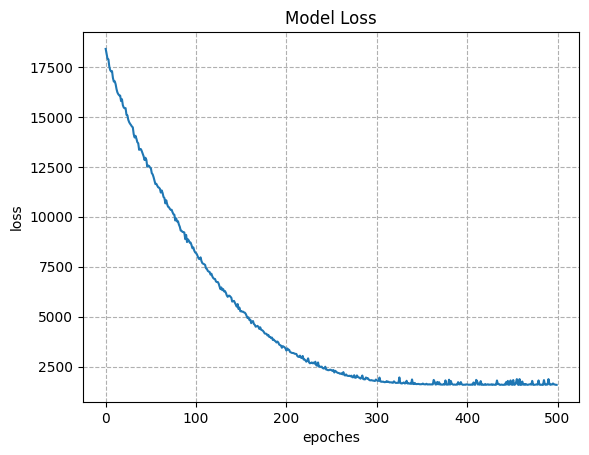

In [85]:
plt.plot(train_history)

plt.title('Model Loss')
plt.xlabel('epoches')
plt.ylabel('loss')
plt.grid(True, linestyle='--')

plt.show()

예측결과

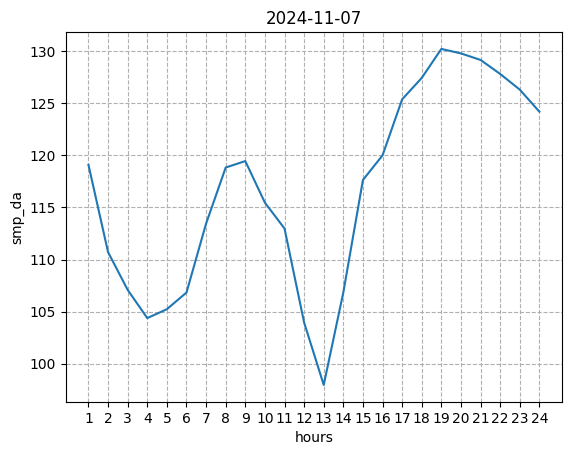

In [94]:
plt.plot(list(range(1, 25)), flattened_list)

plt.title(target_date['predict_target_date'])
plt.xlabel('hours')
plt.ylabel('smp_da')
plt.xticks(list(range(1,25, 1)))
plt.grid(True, linestyle='--')

plt.show()